# Piotr Sotniczuk Homework 4

In [2]:
from sklearn.datasets import load_diabetes

loaded = load_diabetes(as_frame=True)
X = loaded['data']
Y = loaded['target']

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(X, Y, shuffle=True, random_state=5, test_size=0.1)

# Loading data
## Features

Diabetes dataset, all features are standardized and they correspond to body parameters. Features s1-s6 are parameters of blood most of them correspond to fat in blood.

In [42]:
x_test.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
360,0.016281,-0.044642,0.020739,0.021872,-0.013953,-0.013214,-0.006584,-0.002592,0.013316,0.040343
290,0.059871,0.050680,0.076786,0.025315,0.001183,0.016849,-0.054446,0.034309,0.029936,0.044485
191,-0.005515,0.050680,-0.041774,-0.043542,-0.079998,-0.076156,-0.032356,-0.039493,0.010226,-0.009362


## Target
Target is to predict how the illness will develop after a year. Where 0 means nothing changed (very good) and 400 means the diabetes worsened a lot.

In [43]:
y_test

360    281.0
290    332.0
191    178.0
50     155.0
186    137.0
301     65.0
297     31.0
240    275.0
182    138.0
432    173.0
358     90.0
357    221.0
397    198.0
151     88.0
168    268.0
132    107.0
299     83.0
370     63.0
34      65.0
221     93.0
261    103.0
312    144.0
284    156.0
123     84.0
75      42.0
283    181.0
366    233.0
310    109.0
43      92.0
185    101.0
242     71.0
374    140.0
223    150.0
21      49.0
127    109.0
337     91.0
249    215.0
306     44.0
421    212.0
263    116.0
419     42.0
52      59.0
407    140.0
117    281.0
344    200.0
Name: target, dtype: float64

Values of target.

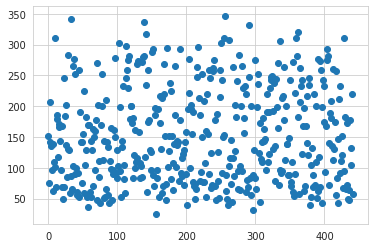

In [9]:
import matplotlib.pyplot as plt

plt.plot(range(Y.size), Y, linestyle = 'None', marker="o")

# Gradient Boosting Regressor

In [4]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor().fit(x_train, y_train)

## Predictions for some observations

In [5]:
y_pred = model.predict(x_test)
taken = [360, 290, 191]

print('index, value, prediction')
for (res, test) in zip(y_pred, y_test.items()):
  if(test[0] in taken):
    print(test[0], test[1], res)

index, value, prediction
360 281.0 184.9988149512188
290 332.0 256.9604136262495
191 178.0 139.90229260272787


In [6]:
from ceteris_paribus.profiles import individual_variable_profile
from ceteris_paribus.plots.plots import plot
from ceteris_paribus.explainer import explain

In [7]:
explainer_gbm = explain(model, data=X, y=Y, label='Gradient Boosting Regressor')

## Explaining and ploting most important features for taken observations
I am using "pyCeterisParibus" library for python. I choose most important features that were selected in previous Homeworks.

In [8]:
for i in taken:
  cp_gbm = individual_variable_profile(explainer_gbm, X.iloc[i], Y.iloc[i])
  plot(cp_gbm, selected_variables=["bmi", "age", "sex", "s5"])

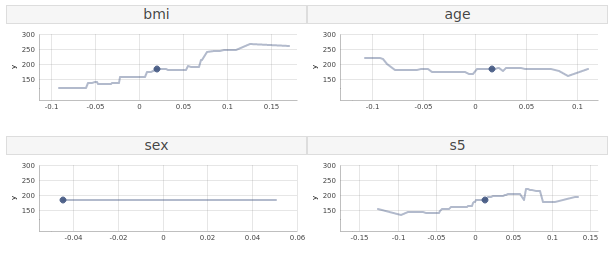

In [18]:
from IPython import display

display.Image("./plot/1.png")

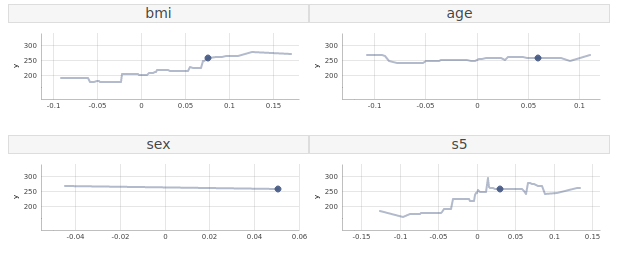

In [17]:
display.Image("./plot/2.png")

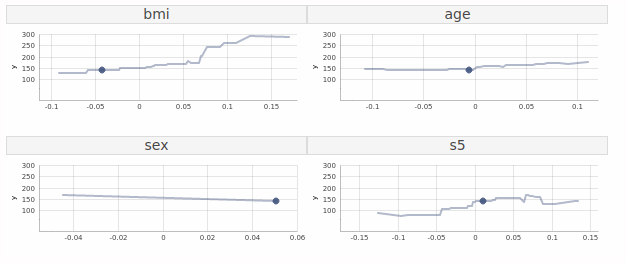

In [19]:
display.Image("./plot/3.png")

For all 3 observations selected features acts similarly. Both bmi and s5 have positive influence while they grow and both sex and age don't really have any influence on the target.

## Looking for some differences

Firstly I looked at all observations from testset with features "bmi", "age", "sex", "s5" but all of them acted pretty the same and it was impossible to find something different. Then I thought of looking into less important variables like "bp", "s1", "s3", "s6" they were not as important as "bmi" or "s5" but they still have some influence on target.

In [10]:
for i in taken:
  cp_gbm = individual_variable_profile(explainer_gbm, X.iloc[i], Y.iloc[i])
  plot(cp_gbm, selected_variables=["bp", "s1", "s3", "s6"])

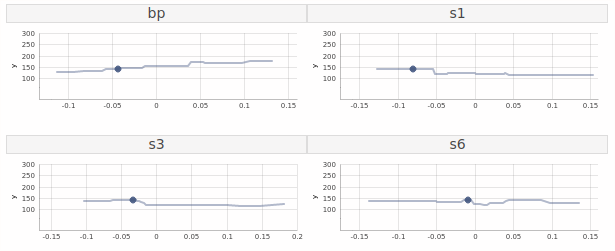

In [20]:
display.Image("./plot/4.png")

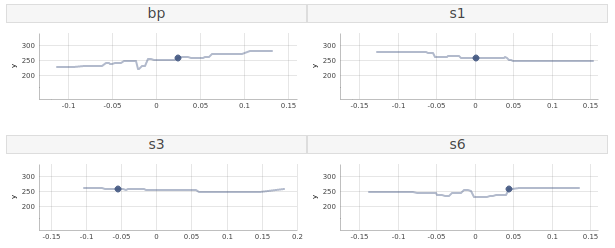

In [21]:
display.Image("./plot/5.png")

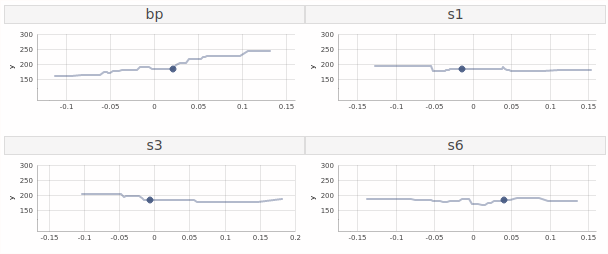

In [22]:
display.Image("./plot/6.png")

In [16]:
#for i in x_test.index:
#  if X.iloc[i]['bmi'] < 0.0164280995 and X.iloc[i]['bmi'] > 0.0164280993:
#    print(i)

This time I had more luck. I choose observations 421 and 366 with feature blood-pressure bp.

In [9]:
choosen = [421, 366]
for i in choosen:
  cp_gbm = individual_variable_profile(explainer_gbm, X.iloc[i], Y.iloc[i])
  plot(cp_gbm, selected_variables=["bp"])

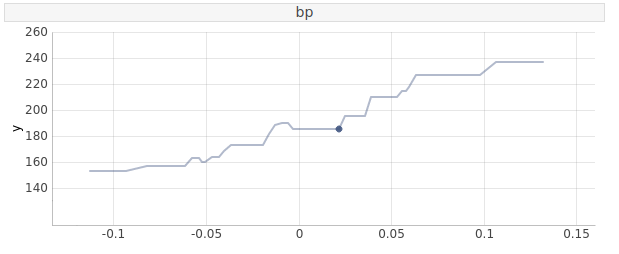

In [23]:
display.Image("./plot/norm.png")

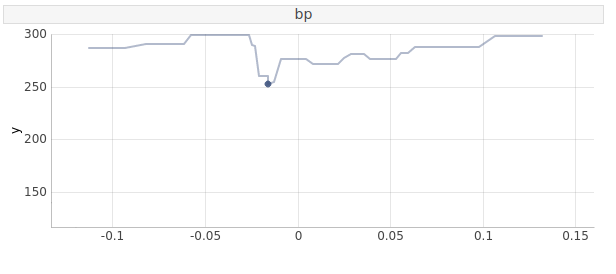

In [24]:
display.Image("./plot/diff.png")

As we can clearly see in 421 bp rises and this was the case in most observations which is normal because usually people with high blood pressure will be less healthy. But for 366 bp doesn't really affect the target we can see that it can even decrease the valeu a bit. Let's look into the details of 366.

In [34]:
X.iloc[366]

age   -0.045472
sex    0.050680
bmi    0.137143
bp    -0.015999
s1     0.041086
s2     0.031880
s3    -0.043401
s4     0.071210
s5     0.071022
s6     0.048628
Name: 366, dtype: float64

This observation has very, very high bmi in my opinion this is why the bp feature has small impact on target. The target is already so high that low or high bp doesn't make a difference. The model is sure that the illness will develop no matter the bp.

# New Model - Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

model_2 = LinearRegression().fit(x_train, y_train)
explainer_lr = explain(model_2, data=X, y=Y, label='Linear Regression')

In [13]:
for i in taken:
  cp_lr = individual_variable_profile(explainer_lr, X.iloc[i], Y.iloc[i])
  plot(cp_lr, selected_variables=["bp", "s1", "s3", "s6"])

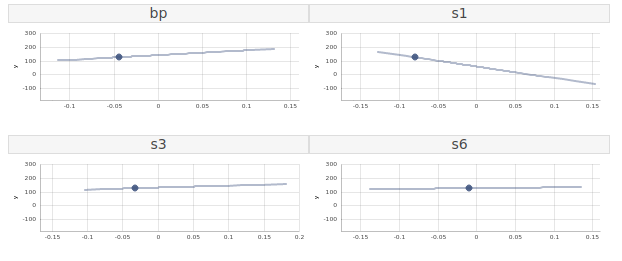

In [25]:
display.Image("./plot/7.png")

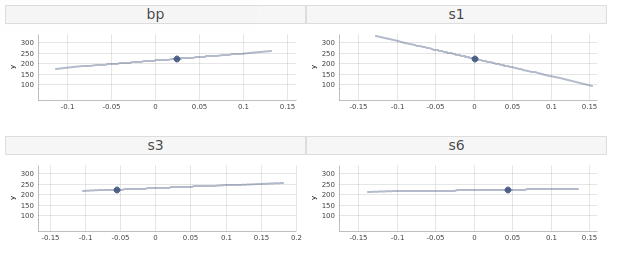

In [26]:
display.Image("./plot/8.png")

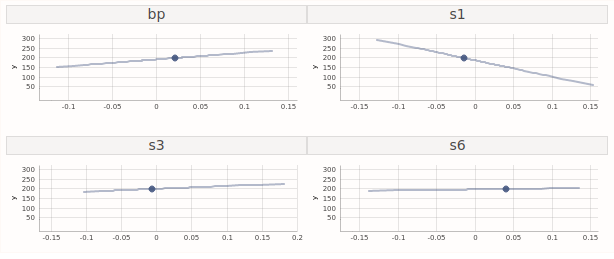

In [27]:
display.Image("./plot/9.png")

After looking into all plots from testset on both sets of features, I have one big observation. All of the plots are straight lines similar for same feature in every observation. That is probably because I used linear regression, so all of the features are taken with same weights for every observation. I think it is impossible to find two observations that have different plots due to this fact.